# Import Packages

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [3]:
from pyadts.datasets import KPIDataset, MSLDataset

# Datasets

## Loading datasets

In [4]:
kpi_dataset = KPIDataset(root='tests/data/kpi', download=False)

::LOADING DATA::: 100%|██████████| 29/29 [00:11<00:00,  2.48it/s]


In [5]:
msl_train_dataset = MSLDataset(root='tests/data/msl', train=True, download=True)
msl_test_dataset = MSLDataset(root='tests/data/msl', train=False, download=True)

D:\Workplace\Pycharm\PyADTS\pyadts\datasets\msl.py:125: UserWarning: This dataset contains no labels for the training set. Thus all data points will be considered as normal by default!
  warnings.warn(


Files are already existed and verified.


::LOADING DATA::: 100%|██████████| 27/27 [00:00<00:00, 1928.58it/s]


Files are already existed and verified.


::LOADING DATA::: 100%|██████████| 27/27 [00:00<00:00, 1038.39it/s]


## Display dataset statistics

In [6]:
# print statistics
print(kpi_dataset)
print(msl_train_dataset)
print(msl_test_dataset)

+-----------+------------+----------+
|     ID    | # Channels | # Points |
+-----------+------------+----------+
|  series-0 |     1      |  149527  |
|  series-1 |     1      |   8784   |
|  series-2 |     1      |  149527  |
|  series-3 |     1      |   8784   |
|  series-4 |     1      |  149527  |
|  series-5 |     1      |  110694  |
|  series-6 |     1      |  131795  |
|  series-7 |     1      |  131795  |
|  series-8 |     1      |   8928   |
|  series-9 |     1      |  149527  |
| series-10 |     1      |  131785  |
| series-11 |     1      |  131795  |
| series-12 |     1      |  149527  |
| series-13 |     1      |  149527  |
| series-14 |     1      |  131790  |
| series-15 |     1      |  149527  |
| series-16 |     1      |  149527  |
| series-17 |     1      |  110694  |
| series-18 |     1      |  111365  |
| series-19 |     1      |   8928   |
| series-20 |     1      |  12475   |
| series-21 |     1      |  149527  |
| series-22 |     1      |  149527  |
| series-23 

In [7]:
# `len()` will output the number of series
print(len(kpi_dataset))
print(len(msl_train_dataset))

29
27


In [8]:
# obtain a certain series
kpi_dataset[0]

,value-0,__label,__timestamp,__anomaly_score,__prediction
0,35.03,0,1491041280,NaN,NaN
1,36.60,0,1491041340,NaN,NaN
2,32.79,0,1491041400,NaN,NaN
3,34.28,0,1491041460,NaN,NaN
4,34.69,0,1491041520,NaN,NaN
...,...,...,...,...,...
149522,36.84,0,1500012600,NaN,NaN
149523,38.61,0,1500012660,NaN,NaN
149524,37.42,0,1500012720,NaN,NaN
149525,37.58,0,1500012780,NaN,NaN


In [9]:
# built-in properties
print('values:\n', kpi_dataset.values)
print('timestamps:\n', kpi_dataset.timestamps)
print('labels:\n', kpi_dataset.labels)
print('scores:\n', kpi_dataset.scores)
print('predictions:\n', kpi_dataset.predictions)

values:
 [array([[35.03],
       [36.6 ],
       [32.79],
       ...,
       [37.42],
       [37.58],
       [36.88]]), array([[0.23419107],
       [0.23665723],
       [0.23088735],
       ...,
       [0.30778186],
       [0.30905991],
       [0.30985095]]), array([[33.47],
       [32.25],
       [31.82],
       ...,
       [40.15],
       [42.76],
       [40.1 ]]), array([[0.25493948],
       [0.24744402],
       [0.23867676],
       ...,
       [0.27454493],
       [0.28080829],
       [0.27911797]]), array([[35.11],
       [35.67],
       [34.34],
       ...,
       [37.22],
       [36.39],
       [37.39]]), array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [24.68],
       [24.88],
       [24.23]]), array([[2.3125],
       [2.75  ],
       [2.5625],
       ...,
       [7.25  ],
       [6.875 ],
       [7.    ]]), array([[2.70000005],
       [3.0999999 ],
       [2.79999995],
       ...,
       [4.69999981],
       [5.        ],
       [4.8499999 ]]), array([[-0.126

In [10]:
# built-in properties
print('shape:\n', kpi_dataset.shape)
print('num_series:\n', kpi_dataset.num_series)
print('num_points:\n', kpi_dataset.num_points)
print('num_channels:\n', kpi_dataset.num_channels)

shape:
 (3073567, 1)
num_series:
 29
num_points:
 3073567
num_channels:
 1


## Dataset conversion

The conversion of `TimeSeriesDataset` will concatenate all series along the channel dimension.

In [11]:
kpi_numpy = kpi_dataset.to_numpy()
print(kpi_numpy.shape)

(3073567, 1)


In [12]:
kpi_tensor = kpi_dataset.to_tensor()
print(kpi_tensor.shape)

torch.Size([3073567, 1])


In [13]:
kpi_numpy_window = kpi_dataset.to_numpy(window_size=100, stride=10)
print(kpi_numpy_window.shape)

(307080, 100, 1)


In [14]:
msl_numpy = msl_train_dataset.to_numpy()
print(msl_numpy.shape)

(58317, 55)


In [15]:
msl_tensor = msl_train_dataset.to_tensor()
print(msl_tensor.shape)

torch.Size([58317, 55])


In [16]:
msl_tensor_window = msl_train_dataset.to_tensor(window_size=200, stride=50)
print(msl_tensor_window.shape)

torch.Size([1071, 200, 55])


## Visualization

### Show original series

C:\Users\larry\AppData\Local\Temp/ipykernel_416/1065714367.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


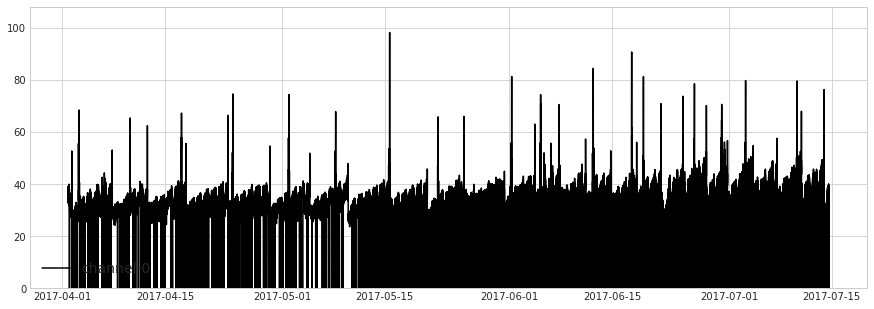

In [17]:
fig = kpi_dataset.plot(series_id=0, channel_id=0, show_ground_truth=False, show_prediction=False)
fig.show()

# Preprocessing

## Validate timestamps and missing value filling

## Normalization

## Simple splitting

## Cross validation